In [14]:
import requests
from bs4 import BeautifulSoup
Base_Url="http://www.fxdayu.com"
Session=requests.session()
headers={"User-Agent":"Mozilla/5.0 (Windows NT 6.1; WOW64; rv:62.0) Gecko/20100101 Firefox/62.0"}
# cookies={"csrftoken":"xSGNsmeZEDLDsloSsZwxU69sql8mra8fDsa3iU6RphQDiEFAMXl62rBnxbIMB1ky"}
r=Session.get("http://www.fxdayu.com/accounts/login/",headers=headers)
token=r.headers["Set-Cookie"].split(";")[0]
print(token)
headers["Set-Cookie"]=token
cookies={"crsftoken":token.split("=")[1]}
bsObj=BeautifulSoup(r.text,"lxml")
url=bsObj.find("img",{"id":"id_password_form-captcha_image"})
value=(bsObj.find("input",{"id":"id_password_form-captcha_0"}))["value"]
csrfmiddlewaretoken=(bsObj.find("input",{"name":"csrfmiddlewaretoken"}))["value"]
print(url["src"])
url=Base_Url+url["src"]
data={
    "csrfmiddlewaretoken":csrfmiddlewaretoken,#crsf验证，防止crsf攻击
    "password_form":"登录",
    "password_form-captcha_0":value,
    "password_form-captcha_1":"",#留着更新验证码
    "password_form-login":"*****",#请输入你的账号
    "password_form-password":"*****"#请输入你的密码
     }
import time
r=Session.get("http://www.fxdayu.com/navbar/top/account?t=%s"%int(time.time()),headers=headers)
print(cookies)

csrftoken=Z6MAQ8xp3V0RqMNO5Pw1wwAT7P4VWpaUbkJ957gw18iVQ5Qk1rgIBwMcsdfrPZD4
/api/captcha/image/370e54843d1b44bd8226e84fc5cc5b0c7c11ad9e/
{'crsftoken': 'Z6MAQ8xp3V0RqMNO5Pw1wwAT7P4VWpaUbkJ957gw18iVQ5Qk1rgIBwMcsdfrPZD4'}


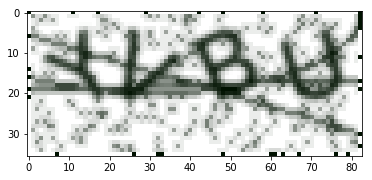

yvbu
{'csrfmiddlewaretoken': 'oZjD4Kwq3HzFiDlmy9GtrIPiBQZ1MLxDAdgcjJfx1URJIWoSuLqawI1BWeaxFl0N', 'password_form': '登录', 'password_form-captcha_0': '370e54843d1b44bd8226e84fc5cc5b0c7c11ad9e', 'password_form-captcha_1': 'yvbu', 'password_form-login': '18955993726', 'password_form-password': 'l1o2V3E4'}


In [15]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
with open("a.png","wb") as f:
    
    r=Session.get(url)
    f.write(r.content)
image=Image.open("a.png")
plt.imshow(image)
plt.show()
captcha=input()
data["password_form-captcha_1"]=captcha
print(data)
r=Session.post("http://www.fxdayu.com/accounts/login/?",data=data,headers=headers,cookies=cookies,allow_redirects=False)

In [16]:
r.encoding="utf-8"

In [17]:
r=Session.get("http://www.fxdayu.com/static/standalone/tutorials.html?article=76")

In [18]:
r.encoding=r.apparent_encoding

In [19]:
print(r.text)

<!DOCTYPE html>
<html lang="zh-CN">

<head>
<meta charset="utf-8">
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="width=device-width, initial-scale=1">
<!-- 上述3个meta标签*必须*放在最前面，任何其他内容都*必须*跟随其后！ -->
<meta name="application-name" content="大鱼金融－国内领先的量化投资解决方案提供商">
<meta name="keywords"
	content="量化课程,数据分析,金融投资,量化投资,量化交易,量化工具,量化引擎,量化研究,量化交易,策略研究,策略社区,python,大鱼金融,自动交易,专业量化,国内量化">
<meta name="description"
	content="大鱼学院给交易爱好者提供从零开始走上宽客之路的免费教学，让大家可以快速掌握做交易要用到的基础代码知识，做到科学客观的量化交易，促进量化领域爱好者的交流成长，互相学习。本课程对交易针对性强，视频制作以精简实用为主，并配有文字与代码的说明。">
<meta name="author" content="大鱼金融">
<title>大鱼学院</title>
<link rel="icon" href="imgs/litLogoNew.png">
<!-- Bootstrap core CSS -->
<link rel="stylesheet" type="text/css" href="https://cdn.bootcss.com/bootstrap/3.3.5/css/bootstrap.css">
<link rel="stylesheet" type="text/css" href="libs/css/editormd.min.css">
<link rel="stylesheet" type="text/css"
	href="css/zuoy

In [20]:
import time
timestamp=int(time.time())
r=Session.get("http://www.fxdayu.com/navbar/top/account?t=%s"%timestamp)

In [21]:
r.text

'\n\n\n<li id="userCenter">\n    <a href="#">leon</a>\n    <ul class="dropdownMenu">\n        <li><a href="userCenter.html">个人主页</a></li>\n        <li><a href="/accounts/logout/">登出</a></li>\n    </ul>\n</li>\n'

In [ ]:
r=Session.get("http://www.fxdayu.com/tutorialType.html")
r=Session.get("http://www.fxdayu.com/tutorials/doc_content/75/")

url=(r.json())['zy_url']
r=Session.get(url)
with open("1.html","w",encoding="utf-8") as f:
    f.write(r.text)